# ДЗ №1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

## 1. Определение функций, которые понадобятся для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

## 2. Подготовка тренировочных данных

In [7]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


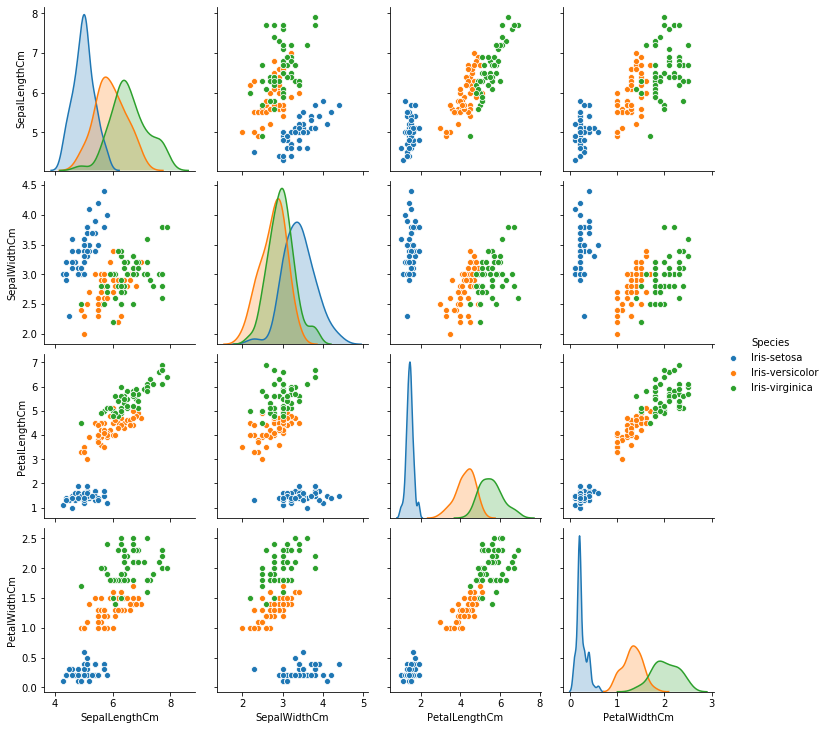

In [8]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [9]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())
x[1:10]

array([[0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [11]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)
y[1:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## Шаг 3. Обученние нейронной сети

In [13]:
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w0, w1

(array([[ 0.66572191,  0.67237541,  0.53781027, -0.80615862,  0.61599202],
        [-0.31531644,  0.80916268,  0.82933601,  0.65456042,  0.23346229],
        [-0.43732001, -0.2974698 ,  0.16586454, -0.68632688,  0.08766099],
        [-0.28060721, -0.78332375, -0.79212753,  0.59375683, -0.36127937]]),
 array([[ 0.18336749, -0.81184824, -0.70115746],
        [ 0.58288915, -0.7947612 , -0.91166133],
        [-0.56383324, -0.16937188,  0.14324302],
        [-0.44373249,  0.02999037,  0.6267166 ],
        [ 0.51796977, -0.13492627,  0.5993738 ]]))

In [14]:
# скорость обучения (learning rate)
n = 0.1

In [15]:
# массив для ошибок, чтобы потом построить график
errors = []

In [16]:
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    if not(i % 5000):
        print(f"epoсh: {i+1}")

epoсh: 1
epoсh: 5001
epoсh: 10001
epoсh: 15001
epoсh: 20001
epoсh: 25001
epoсh: 30001
epoсh: 35001
epoсh: 40001
epoсh: 45001
epoсh: 50001
epoсh: 55001
epoсh: 60001
epoсh: 65001
epoсh: 70001
epoсh: 75001
epoсh: 80001
epoсh: 85001
epoсh: 90001
epoсh: 95001


## Шаг 4. Демонстрация полученных результатов

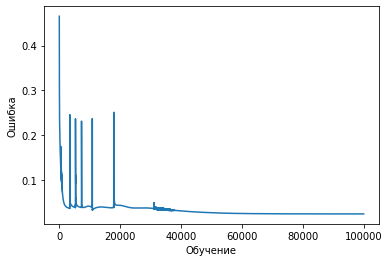

In [17]:
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

In [18]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 97.45%


## Шаг 5. Подбор параметров

In [32]:
# процесс обучения
def two_layer_nn_learning(lr = 0.1, epoch = 20000):
    errors = []
    np.random.seed(1)
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    
    for i in range(epoch):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        if not(i % 5000):
            print(f"\tepoсh: {i+1}")
    
    return errors, accuracy, w0, w1

In [56]:
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning()

	epoсh: 1
	epoсh: 5001
	epoсh: 10001
	epoсh: 15001


In [60]:
def two_layer_nn_predict(x, w0, w1):
    layer0 = x
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    return layer2

In [62]:
pr = two_layer_nn_predict(X_train, w0_tr, w1_tr)

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [72]:
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"mean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}\n")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"mean_absolute_error train:\t{mean_absolute_error(y_test, pr_ts):.3f}\n")

mean_absolute_error train:	0.036

mean_absolute_error train:	0.038



Шаг обучения: 1.0 Эпох: 5000
	epoсh: 1


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


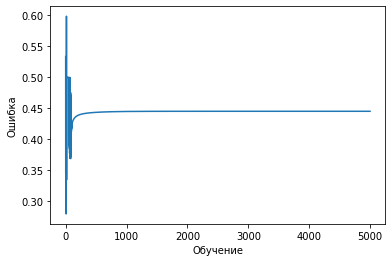

	Точность нейронной сети:	55.5%
	mean_absolute_error train:	0.445
	mean_absolute_error test:	0.420


Шаг обучения: 0.1 Эпох: 10000
	epoсh: 1


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5001


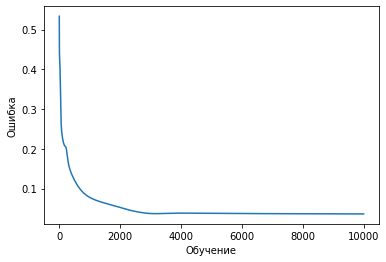

	Точность нейронной сети:	96.35%
	mean_absolute_error train:	0.036
	mean_absolute_error test:	0.035


Шаг обучения: 0.01 Эпох: 75000
	epoсh: 1
	epoсh: 5001
	epoсh: 10001
	epoсh: 15001
	epoсh: 20001
	epoсh: 25001
	epoсh: 30001
	epoсh: 35001
	epoсh: 40001
	epoсh: 45001
	epoсh: 50001
	epoсh: 55001
	epoсh: 60001
	epoсh: 65001
	epoсh: 70001


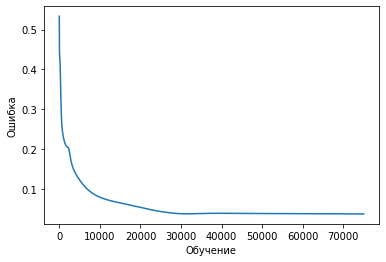

	Точность нейронной сети:	96.31%
	mean_absolute_error train:	0.037
	mean_absolute_error test:	0.035


Шаг обучения: 0.001 Эпох: 300000
	epoсh: 1
	epoсh: 5001
	epoсh: 10001
	epoсh: 15001
	epoсh: 20001
	epoсh: 25001
	epoсh: 30001
	epoсh: 35001
	epoсh: 40001
	epoсh: 45001
	epoсh: 50001
	epoсh: 55001
	epoсh: 60001
	epoсh: 65001
	epoсh: 70001
	epoсh: 75001
	epoсh: 80001
	epoсh: 85001
	epoсh: 90001
	epoсh: 95001
	epoсh: 100001
	epoсh: 105001
	epoсh: 110001
	epoсh: 115001
	epoсh: 120001
	epoсh: 125001
	epoсh: 130001
	epoсh: 135001
	epoсh: 140001
	epoсh: 145001
	epoсh: 150001
	epoсh: 155001
	epoсh: 160001
	epoсh: 165001
	epoсh: 170001
	epoсh: 175001
	epoсh: 180001
	epoсh: 185001
	epoсh: 190001
	epoсh: 195001
	epoсh: 200001
	epoсh: 205001
	epoсh: 210001
	epoсh: 215001
	epoсh: 220001
	epoсh: 225001
	epoсh: 230001
	epoсh: 235001
	epoсh: 240001
	epoсh: 245001
	epoсh: 250001
	epoсh: 255001
	epoсh: 260001
	epoсh: 265001
	epoсh: 270001
	epoсh: 275001
	epoсh: 280001
	epoсh: 285001
	epoсh: 290001
	epoс

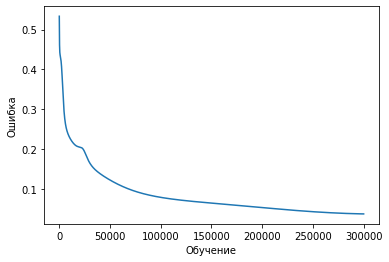

	Точность нейронной сети:	96.26%
	mean_absolute_error train:	0.037
	mean_absolute_error test:	0.027




In [76]:
iter = 4
lrl = np.logspace(0, -3, iter)
ep = [5000, 10000, 35000, 300000]

for i in range(0, iter):
    print(f"Шаг обучения: {lrl[i]} Эпох: {ep[i]}")
    errors = []
    errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr = lrl[i], epoch = ep[i])
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()
    
    print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
    pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
    print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
    pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
    print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

Шаг обучения: 0.1 Эпох: 3000
	epoсh: 1


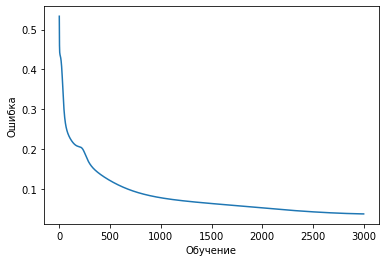

	Точность нейронной сети:	96.25%
	mean_absolute_error train:	0.037
	mean_absolute_error test:	0.027




In [77]:
print(f"Шаг обучения: 0.1 Эпох: 3000")
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr = 0.1, epoch = 3000)
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

## Выводы

Варьирование шага обучения и количества эпох показывает, что при уменьшении шага замедляется достижение минимума функции ошибки. Уменьшение шага ниже 0.1 не позволяет добиться значительного прироста точности. Проверка на test выборке не показывает значительного переобучения.

Параметры: шаг обучения 0.1 количество эпох 3000 позволяют добиться достижимой точности (при текущей структуре сети) и уменьшить количество итераций.